# <div align="center">CM6</div>


###  6.1 Required Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import mean, std
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn import preprocessing, metrics,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 

### 6.2 Load dataset and assign column names to each feature


In [2]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines = False, warn_bad_lines =True)
df.columns = ['area', 'perimeter','compactness', 'length_kernel', 'width_kernel', 'asymmetry_coeff', 'length_of_kernel_groove', 'target']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     198 non-null    float64
 1   perimeter                198 non-null    float64
 2   compactness              198 non-null    float64
 3   length_kernel            198 non-null    float64
 4   width_kernel             198 non-null    float64
 5   asymmetry_coeff          198 non-null    float64
 6   length_of_kernel_groove  198 non-null    float64
 7   target                   198 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


### 3.3 Extracting features and label from dataset

x variable contains all features values and y variable contains all target values.

In [3]:
x = df.iloc[:, :-1].values

y = df.iloc[:, 7].values

### 6.4 Split dataset into train and test set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state = None)

### 6.5 Data Preprocessing 

In [5]:

scaler = StandardScaler()
x = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### 6.6 Applying 10-fold validation on dataset

In [6]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
kfold.get_n_splits(x_train)

10

### 6.7 Decision Tree with multiple depth

In [7]:
acc1 = []
depth = [3, 5, 10, None]
for k in depth:
    model = DecisionTreeClassifier(max_depth = k)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    if ( k != None):
        print(f'Depth :  {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
      
    else:
        print(f'Depth : {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
    acc1 = np.append(acc1, mean(scores))

Depth :  3 ===> Accuracy = 0.9055147058823529 and Standard Devaition = 0.06531402882682782
Depth :  5 ===> Accuracy = 0.9047794117647058 and Standard Devaition = 0.06695720015240435
Depth :  10 ===> Accuracy = 0.9047794117647058 and Standard Devaition = 0.06695720015240435
Depth : None ===> Accuracy = 0.9165441176470589 and Standard Devaition = 0.055902908371209654


### 6.7.1 Conclusion of DecisionTreeClassifier:

- Inorder to achieve highest accuracy for this model, depth should be None.
- At depth = None model able to achieve accuracy = 0.91654.

### 6.8 Naive Bayes classifier and Gaussian Naive Bayes classifier

In [8]:
var_smoothing = [1e-10,1e-9, 1e-5, 1e-3, 1e-1]
acc2= []
for i in var_smoothing:
    model = GaussianNB(var_smoothing = i)    
    model.fit(x_train, y_train)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    print(f'var_smoothing = {i} ==> Accuracy =  {mean(scores)} and Standard Devaition = {std(scores)}')
    acc2 = np.append(acc2, mean(scores))

var_smoothing = 1e-10 ==> Accuracy =  0.8985294117647058 and Standard Devaition = 0.06785454114740781
var_smoothing = 1e-09 ==> Accuracy =  0.8985294117647058 and Standard Devaition = 0.06785454114740781
var_smoothing = 1e-05 ==> Accuracy =  0.9102941176470589 and Standard Devaition = 0.06391562885911979
var_smoothing = 0.001 ==> Accuracy =  0.9220588235294118 and Standard Devaition = 0.06836258411276153
var_smoothing = 0.1 ==> Accuracy =  0.9161764705882354 and Standard Devaition = 0.07838387041903783


### 6.9 Comparing Decision Tree and other Naive bayes models with respect to performance matrix ( Accuracy ):

In [16]:

models = []
models.append(('DTC', DecisionTreeClassifier(max_depth = None)))
models.append(('GN', GaussianNB(var_smoothing = 1e-1)))
models.append(('MN', MultinomialNB()))
models.append(('BN', BernoulliNB()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DTC: 0.893382 (0.068761)
GN: 0.916176 (0.078384)
MN: 0.713235 (0.182325)
BN: 0.207721 (0.087207)


### 6.9.1 Box and whisker  plot for various models :

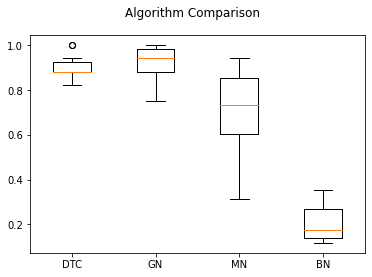

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 6.10 Conclusion various models :


1. **DecisionTreeClassifier :** 
    1. Minimum and maximum value of accuracy are very near to each other compare to other models.
    2. Median of accuracy at depth = 3 is 0.893.
    3. Interquantile range is also very small which means there are no major difference in accuracy for this model (  **Less variance** ).
    4. There is also one point which is outside interquantile and min-max range.
2. **GaussianNB :** 
    1. Minimum and maximum value of accuracy are falling in between 0.91 to 0.97.
    2. Median of accuracy for this model is 0.94.
    3. Interquantile range is also large compare to DecisionTreeClassifier which means there are very major difference in accuracy for this model( More variations in accuracy ).
    4. Using Box and whisker plotting, it can be seen that there are some accuracy at 0.8.
3. **MultinomialNB :** 
    1. The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification),  which is not best fit for seed dataset.
    2. Median of accuracy for this model is 0.71.
    3. Interquantile range is also smallest compare to other models.
    4. **This naive bayes model not suit for seed dataset.**
4. **BernoulliNB :** 
    1. The bernoulli Naive Bayes classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.
    2. Median of accuracy for this model is 0.20.
    3. **This naive bayes model not suit for seed dataset.**

### 6.11 Using Gaussian Naive bayes inorder to fetch learned parameters 

In [11]:
model1 = GaussianNB(var_smoothing = 1e-1)
model1.fit(x_train, y_train)
scores = cross_val_score(model1, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)

#### 6.11.1 Variance of each feature per label class

In [12]:
variance = []
variance = model1.sigma_
print(variance)

[[2.18814816 1.1527379  0.85390915 0.90575883 0.88286954 2.3317778
  0.92609694]
 [2.76400322 1.18995274 0.85387156 0.91654013 0.88898792 2.23793473
  0.91181304]
 [1.34615089 0.96773834 0.85405981 0.87107048 0.87423259 2.25230975
  0.87832821]]


#### 6.11.2 Mean of each feature per label class

In [13]:
mean = []
mean = model1.theta_
print(mean)

[[14.28407407 14.26833333  0.8803537   5.49833333  3.24190741  2.79929815
   5.06224074]
 [18.3877193  16.16631579  0.88279649  6.16159649  3.67789474  3.57484211
   6.02678947]
 [11.90473684 13.26736842  0.84916667  5.23515789  2.85407018  4.67207018
   5.12131579]]


#### 6.11.3 Epsilon value which model can use to add in variances

In [14]:
E = []
E = model1.epsilon_
print(E)

0.85362771789966


### 6.12 Sigma, theta and epsilon are learned parameters in GaussianNB

**Attributes :**

1. sigma_ : This attribute in GaussianNB calculates variance of each feature per class. As model has 3 label values ( 'Kama', 'Rosa', 'Canadian' ) and 7 features ( Number of columns excluding label columns ) this attribute will create 3x7 array. Each value represents variance of perticular label value and perticular feature.

2. theta_ : This attribute in GaussianNB calculates mean of each feature per class. As model has 3 label values ( 'Kama', 'Rosa', 'Canadian' ) and 7 features ( Number of columns excluding label columns ) this attribute will create 3x7 array. Each value represents mean of perticular label value and perticular feature. 

3. epsilon_ : This attribute in GaussianNB return value which we can add to variances.

### 6.13 Single decision tree model

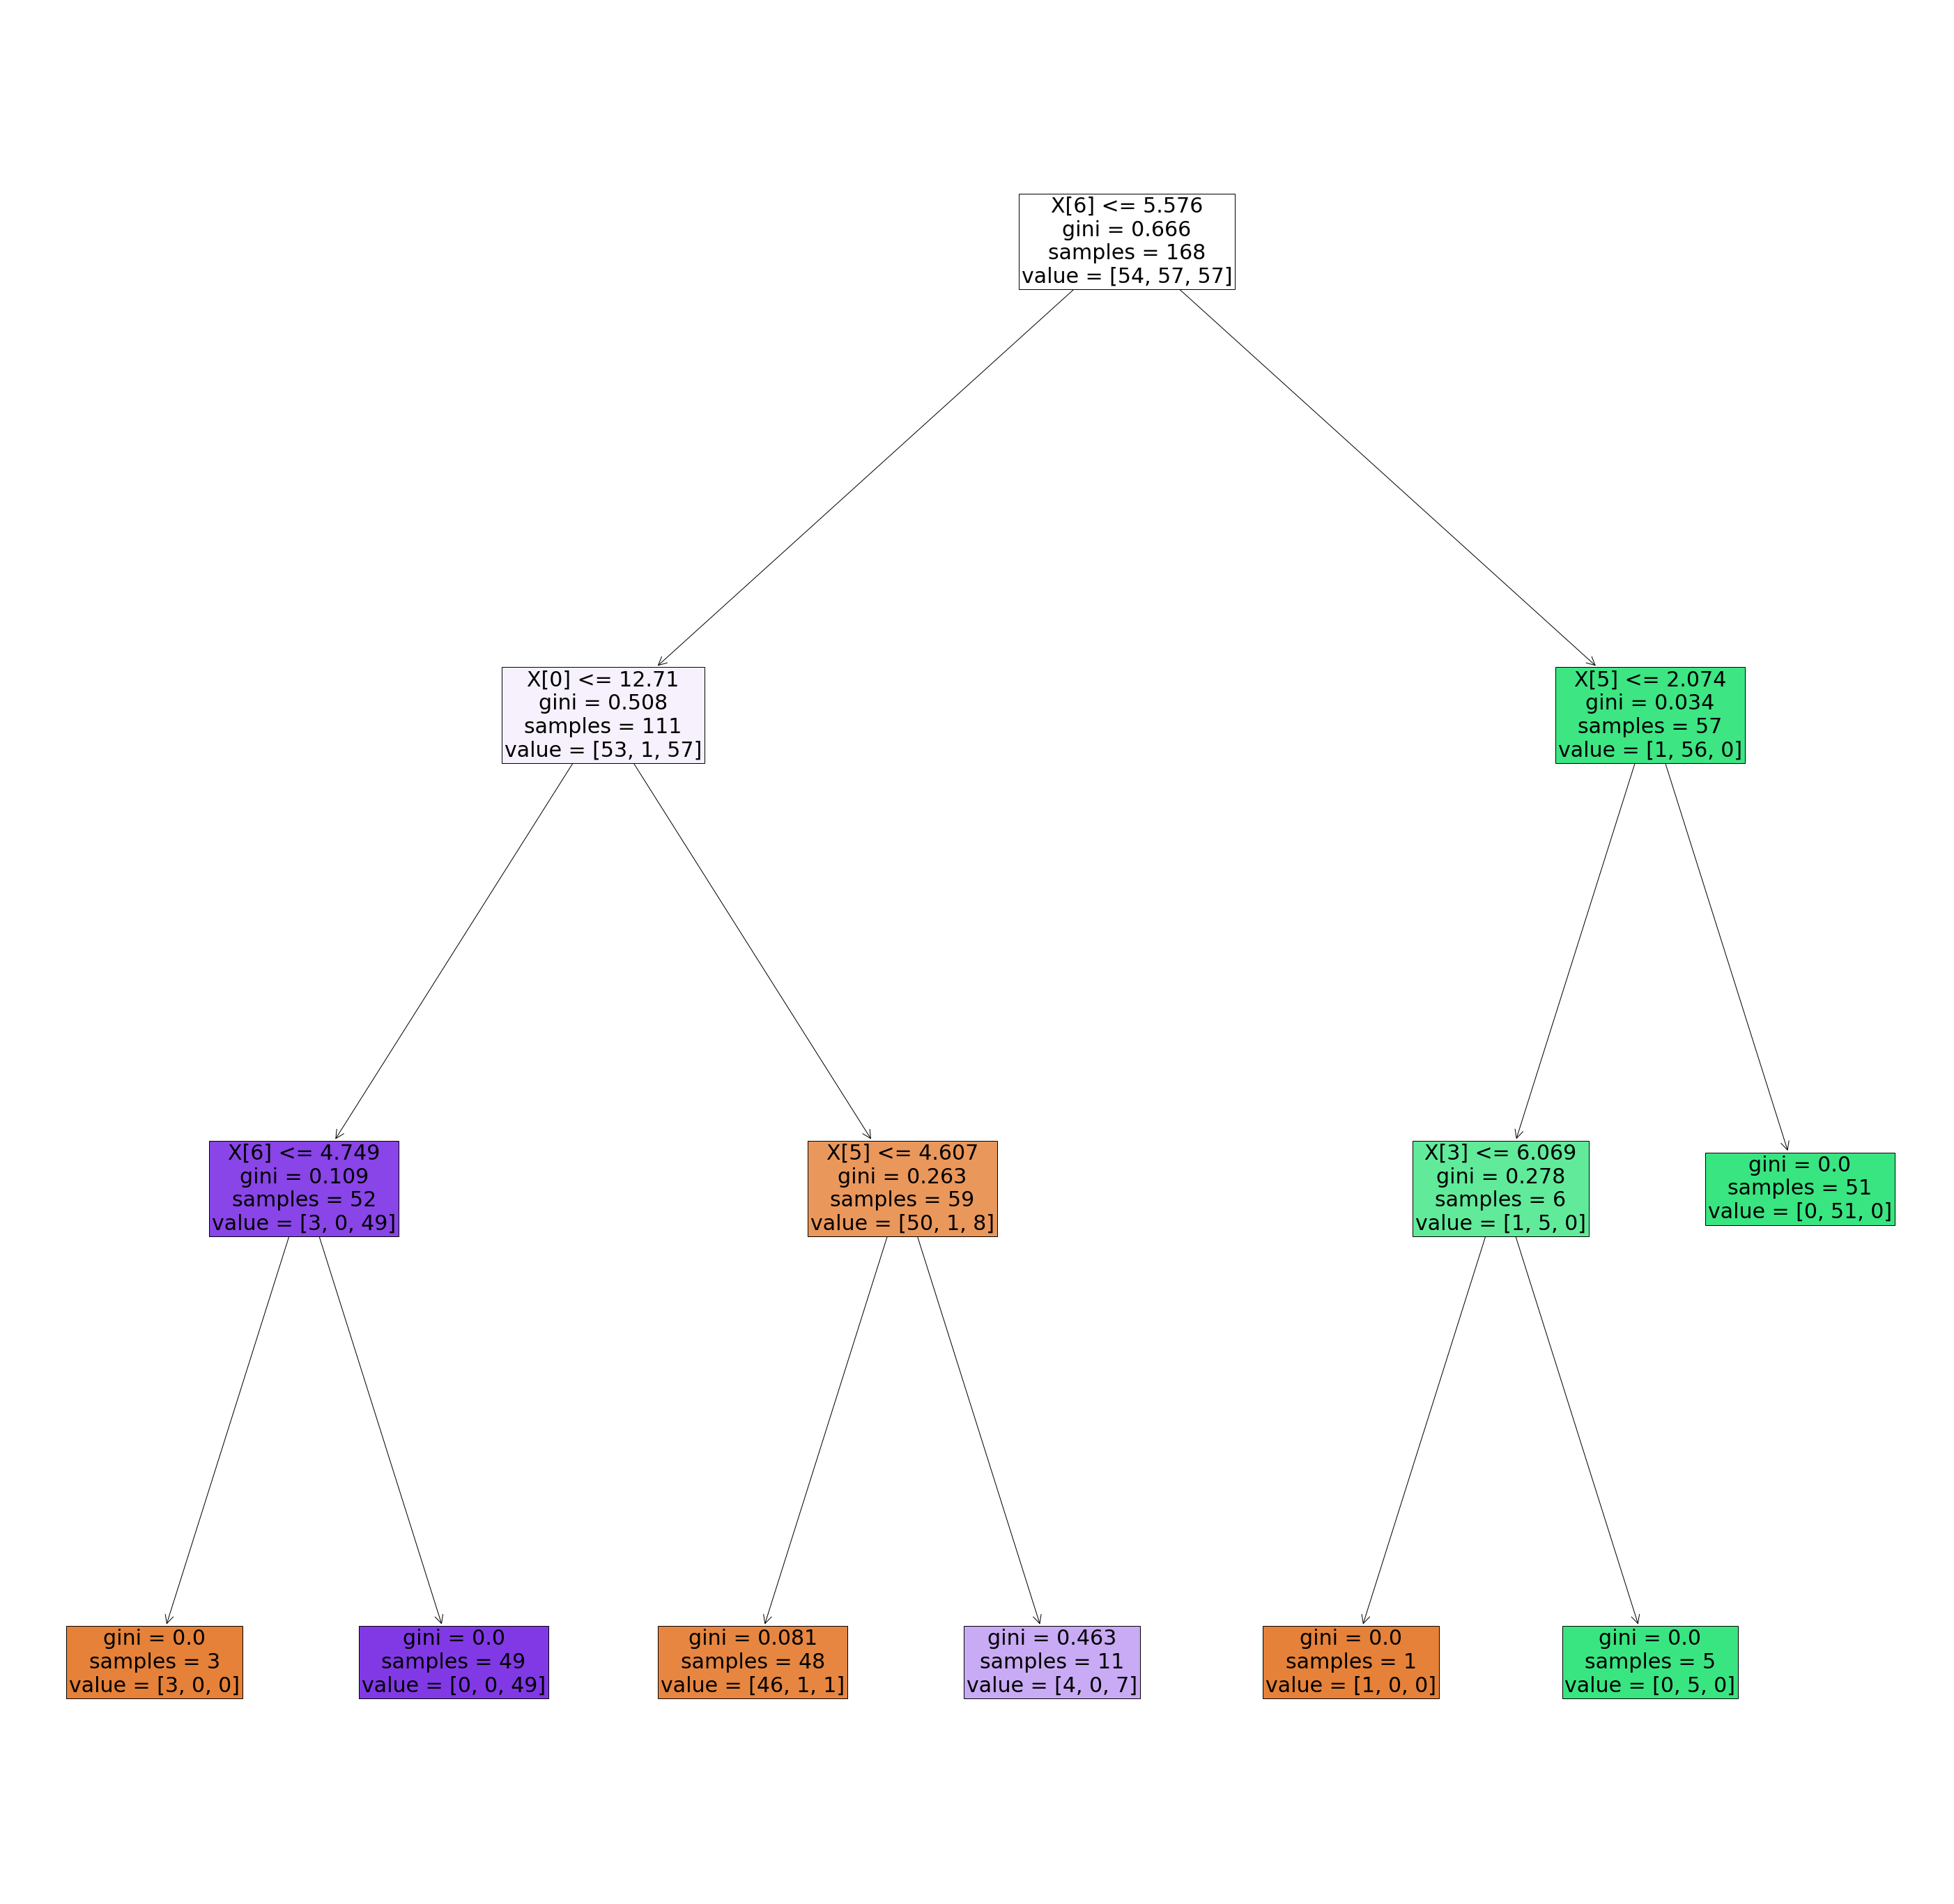

In [15]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train,y_train)
fig = plt.figure(figsize=(50,50))
tree.plot_tree(model,fontsize=30,max_depth=3,filled=True)
plt.show()

### 6.14 Comparision of learned parameters with single decision tree :

**From single Decision tree and learned parameters it can be seen that  :**

- Any features selected by Decision tree, Split point mostly near to theta values.

- At split point, ratio of samples for class labels are also nearer to theta values which are defined by GaussianNB.



### 6.15 Conclusion :

- **Yes**. From learned parameters ( theta, sigma and epsilon ), we can easily interpret and compare data to Single Decision Tree.

- At split point, DecisionTreeClassifier mostly use those learned parameter to divide samples of dataset. 